In [1]:
#!/usr/bin/env python
"""
Description
"""
import os
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from RepresentativeWeeks import *
from misc.RepresentativePeriods import SolarPanelSingleNode

from runOpt import get_json

%matplotlib inline

In [2]:
energy_sol_repr = None
energy_backup_repr = None
energy_stor_loss_repr = None
energy_curt_repr = None

energy_sol_full = None
energy_curt_full = None
energy_stor_loss_full = None
energy_backup_full = None

############################################
## PARAMETERS
############################################

In [3]:
num = 5
A = 60000
V = 100e3
P = 3.85e6
print 'A:', str(A)
print 'V:', str(V)
print 'P:', str(P)

A: 60000
V: 100000.0
P: 3850000.0


In [4]:
full_model = SolarPanelSingleNode.fullyear(storVol=V, solArea=A,
                                           backupPow=P)

status = SolarPanelSingleNode.solve_fullyear(full_model)
print 'Full optimization solved with status', str(status)

if status == 0:
    energy_backup_full = SolarPanelSingleNode.get_backup_energy(
        full_model)
    energy_stor_loss_full = SolarPanelSingleNode.get_stor_loss(
        full_model)
    energy_curt_full = SolarPanelSingleNode.get_curt_energy(
        full_model)
    energy_sol_full = \
        SolarPanelSingleNode.get_sol_energy(full_model)
    energy_full = SolarPanelSingleNode.get_backup_energy(full_model)
    #fig2 = SolarPanelSingleNode.plot_single_node(full_model)
    # fig2.savefig(os.path.join('comparison', corr, '{}w_{}A_{}V_{}P_full.png'.format(num, A, V, P)), dpi=300)

02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter Te
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
02-06 08:12 modesto.Node                         INFO     Initializing Node Node
02-06 08:12 modesto.component.Component          INFO     Initializing Component storage
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter volume
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter ar
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:12 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
02-06 08:12 modesto.parameter.Parameter          INFO     

Writing time: 20.4129998684
Academic license - for non-commercial use only
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 122643 rows, 96364 columns and 245283 nonzeros
Coefficient statistics:
  Matrix range     [6e-06, 2e+05]
  Objective range  [1e-03, 1e+00]
  Bounds range     [4e+06, 2e+12]
  RHS range        [5e-11, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 116482 rows and 81022 columns
Presolve time: 0.16s
Presolved: 6161 rows, 15342 columns, 21503 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.161e+03
 Factor NZ  : 1.046e+05 (roughly 10 MBytes of memory)
 Factor Ops : 2.208e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Pr

## Representative periods from here

In [3]:
selection = get_json('C:/Users/u0094934/Research/TimeSliceSelection/Scripts/solutions7.txt')[12]

In [4]:
duration_repr = 7

In [5]:
print selection

OrderedDict([(7, 2.0), (15, 4.0), (24, 4.0), (65, 3.0), (81, 6.0), (131, 6.0), (179, 10.0), (229, 7.0), (281, 3.0), (294, 2.0), (337, 2.0), (351, 3.0)])


In [31]:
# Solve representative weeks
repr_model, optimizers = representative(
    duration_repr=duration_repr,
    selection=selection, solArea=A, storVol=V,
    backupPow=P)

02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Te
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
02-06 08:19 modesto.Node                         INFO     Initializing Node Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component storage
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter volume
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ar
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
02-06 08:19 modesto.parameter.Parameter          INFO     

zeta H is: 0.999993803367


02-06 08:19 modesto.Node                         INFO     Optimization block initialized for Node
02-06 08:19 modesto.components.VarProducer       INFO     Optimization block for Component backup initialized
02-06 08:19 modesto.component.Component          INFO     Optimization block for Component storage initialized
02-06 08:19 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
02-06 08:19 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
02-06 08:19 modesto.component.Component          INFO     Optimization block for Component demand initialized
02-06 08:19 modesto.component.Component          INFO     Optimization model <class 'modesto.component.BuildingFixed'> demand compiled
02-06 08:19 modesto.Node                         INFO     Compilation of Node finished
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Te
02-06 08:19 modesto.parameter.Parameter      

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter volume
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ar
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter reps
02-06 08:19 modesto.Node                         INFO     Component storage added to Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component backup
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter PEF
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter CO2
02-06 08:19 modesto.parameter.Parameter

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter volume
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ar
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter reps
02-06 08:19 modesto.Node                         INFO     Component storage added to Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component backup
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
02-06 08:19 modesto.parameter.Para

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter fuel_cost
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Qmax
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ramp
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ramp_cost
02-06 08:19 modesto.components.VarProducer       INFO     Initializing VarProducer backup
02-06 08:19 modesto.Node                         INFO     Component backup added to Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component solar
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter area
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
02-06 08:19 modesto.components.SolThermCol       INFO     Initializing SolarThermalCollector solar
02-06 08:19 

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter reps
02-06 08:19 modesto.Node                         INFO     Component storage added to Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component backup
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter PEF
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter CO2
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter fuel_cost
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Qmax
02-06 08:19 modesto.parameter.Para

zeta H is: 0.999993803367


02-06 08:19 modesto.component.Component          INFO     Initializing Component storage
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter volume
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ar
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter kIns
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_stor
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter reps
02-06 08:19 modesto.Node                         INFO     Component storage added to Node
02-06 08:19 modesto.component.Component 

zeta H is: 0.999993803367


02-06 08:19 modesto.Node                         INFO     Compilation of Node finished
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Te
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Tg
02-06 08:19 modesto.Node                         INFO     Initializing Node Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component storage
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Thi
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Tlo
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter mflo_max
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter volume
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ar
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter dIns
02-06 08:19 modesto.parameter.Parameter          INFO    

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter reps
02-06 08:19 modesto.Node                         INFO     Component storage added to Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component backup
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter efficiency
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter PEF
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter CO2
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter fuel_cost
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter Qmax
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ramp
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter ramp_cost
02-06 08:19 modesto.components.VarProducer       INFO     Initializing VarProducer backup
02-06 08:19 modesto.Node      

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
02-06 08:19 modesto.components.SolThermCol       INFO     Initializing SolarThermalCollector solar
02-06 08:19 modesto.Node                         INFO     Component solar added to Node
02-06 08:19 modesto.component.Component          INFO     Initializing Component demand
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter mult
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
02-06 08:19 modesto.Node                         INFO     Component demand added to Node
02-06 08:19 modesto.Node                         INFO     Build of Node finished
02-06 08:19 modesto.Node                         INFO     Optimization block initialized for Node
02-06

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter mult
02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
02-06 08:19 modesto.Node                         INFO     Component demand added to Node
02-06 08:19 modesto.Node                         INFO     Build of Node finished
02-06 08:19 modesto.Node                         INFO     Optimization block initialized for Node
02-06 08:19 modesto.components.VarProducer       INFO     Optimization block for Component backup initialized
02-06 08:19 modesto.component.Component          INFO     Optimization block for Component storage initialized
02-06 08:19 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
02-06 08:19 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
02-06 08:19 modesto.co

zeta H is: 0.999993803367


02-06 08:19 modesto.parameter.Parameter          INFO     Initializing Parameter heat_profile
02-06 08:19 modesto.Node                         INFO     Component demand added to Node
02-06 08:19 modesto.Node                         INFO     Build of Node finished
02-06 08:19 modesto.Node                         INFO     Optimization block initialized for Node
02-06 08:19 modesto.components.VarProducer       INFO     Optimization block for Component backup initialized
02-06 08:19 modesto.component.Component          INFO     Optimization block for Component storage initialized
02-06 08:19 modesto.component.Component          INFO     Optimization model StorageCondensed storage compiled
02-06 08:19 modesto.components.SolThermCol       INFO     Optimization block for Component solar initialized
02-06 08:19 modesto.component.Component          INFO     Optimization block for Component demand initialized
02-06 08:19 modesto.component.Component          INFO     Optimization model <class 'mo

zeta H is: 0.999993803367
State equation added for storage Node.storage in representative week starting on day 351
State equation added for storage Node.storage in representative week starting on day 7
State equation added for storage Node.storage in representative week starting on day 15
State equation added for storage Node.storage in representative week starting on day 24
State equation added for storage Node.storage in representative week starting on day 65
State equation added for storage Node.storage in representative week starting on day 81
State equation added for storage Node.storage in representative week starting on day 131
State equation added for storage Node.storage in representative week starting on day 179
State equation added for storage Node.storage in representative week starting on day 229
State equation added for storage Node.storage in representative week starting on day 281
State equation added for storage Node.storage in representative week starting on day 294
S

In [32]:
status = solve_repr(repr_model)
print 'Representative weeks solved with status', str(status)

corr='7dNewSol'

if status==0:
    energy_backup_repr = get_backup_energy(
        optimizers, selection)
    energy_stor_loss_repr = get_stor_loss(
        optimizers, selection)
    energy_curt_repr = get_curt_energy(
        optimizers, selection)
    energy_sol_repr = get_sol_energy(
        optimizers, selection)
    if not os.path.isdir(os.path.join('comparison', corr)):
        os.mkdir(os.path.join('comparison', corr))
        # fig1.savefig(os.path.join('comparison', corr, '{}w_{}A_{}V_{}P_repr.png'.format(num, A, V, P)), dpi=300)

Academic license - for non-commercial use only
Read MIP start from file c:\users\u0094934\appdata\local\temp\tmpu7dwn0.gurobi.mst
Changed value of parameter NumericFocus to 1
   Prev: 0  Min: 0  Max: 3  Default: 0
Optimize a model with 43809 rows, 33741 columns and 88265 nonzeros
Coefficient statistics:
  Matrix range     [6e-06, 2e+05]
  Objective range  [2e-03, 1e+01]
  Bounds range     [4e+06, 2e+12]
  RHS range        [2e-02, 1e+09]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 37605 rows and 25457 columns
Presolve time: 0.07s
Presolved: 6204 rows, 8284 columns, 21219 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.381e+04
 Factor NZ  : 1.121e+05 (roughly 7 MBytes of memory)
 Factor Ops : 2.172e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.12434078e+09 -1.22199191e+10  

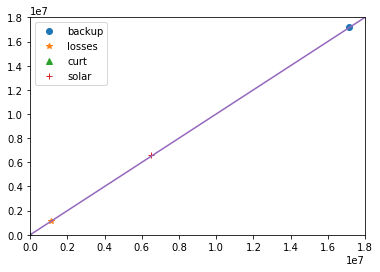

In [33]:
fig, ax = plt.subplots()

ax.plot(energy_backup_full, energy_backup_repr, 'o', label='backup')
ax.plot(energy_stor_loss_full, energy_stor_loss_repr, '*', label='losses')
ax.plot(energy_curt_full, energy_curt_repr, '^', label='curt')
ax.plot(energy_sol_full, energy_sol_repr, '+', label='solar')

x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

ax.legend()

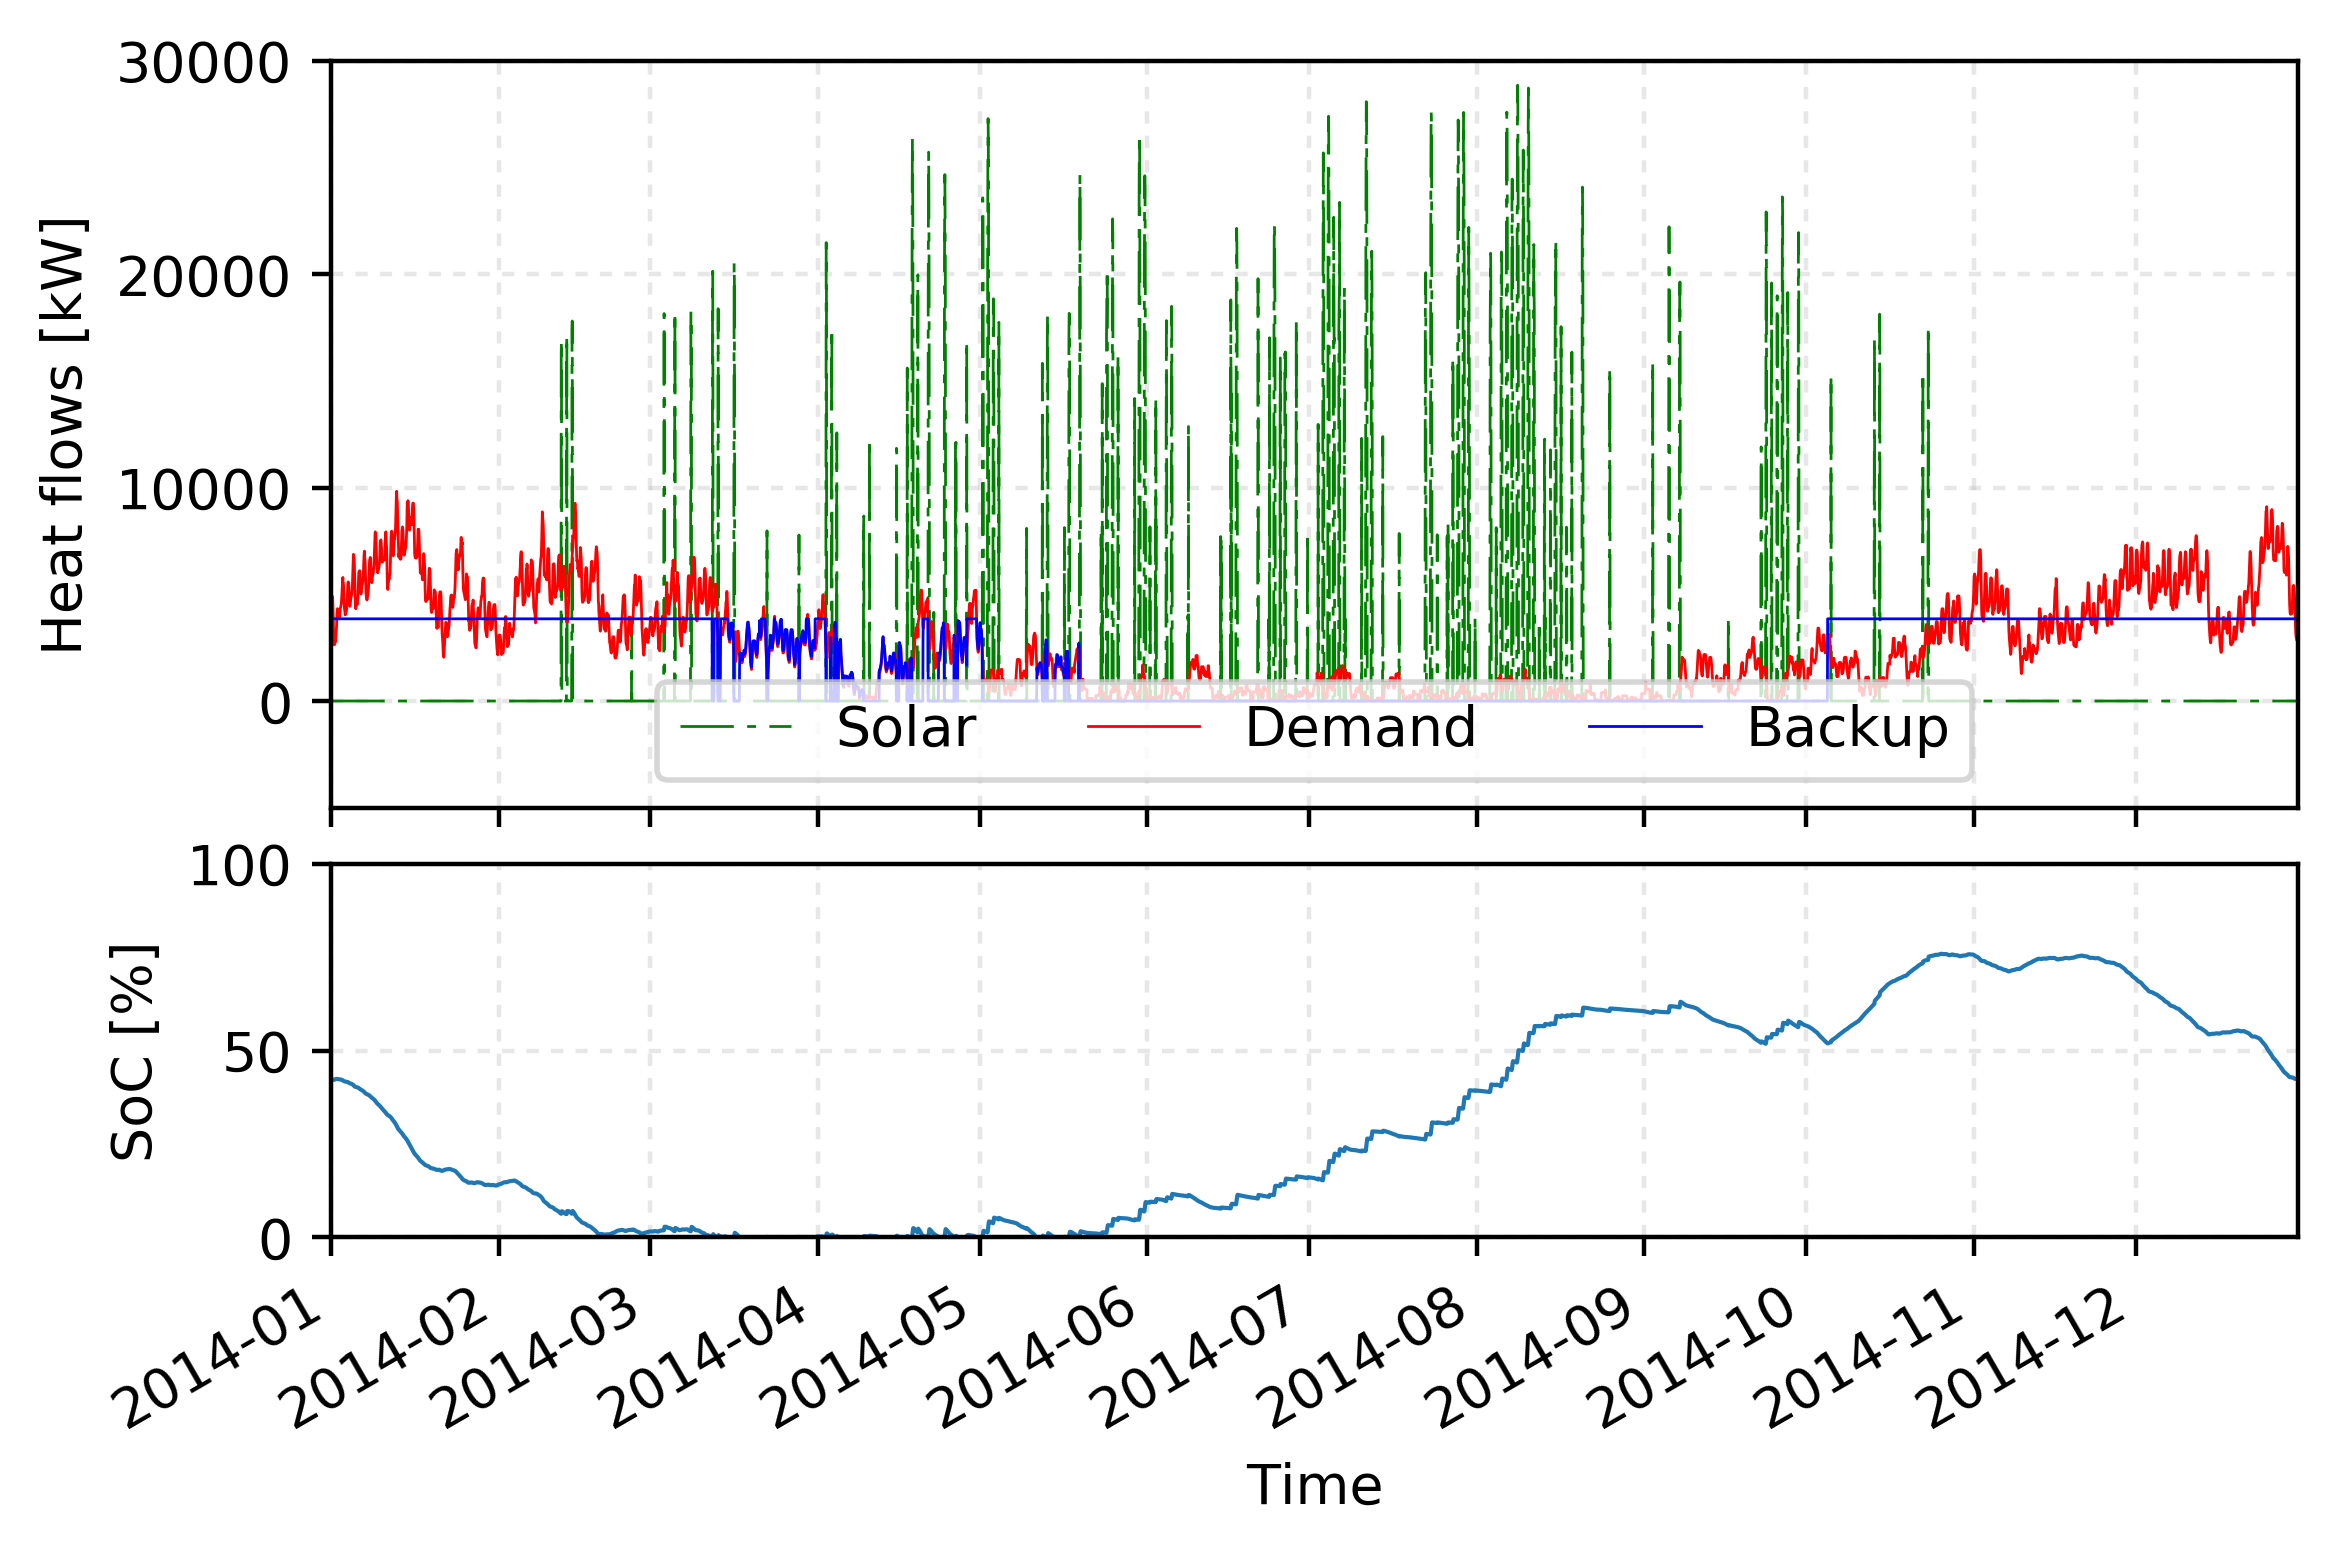

In [34]:
fig, axs = plt.subplots(2, 1, sharex=True,
                            gridspec_kw=dict(height_ratios=[2, 1]))

# axs[0].plot(optmodel.get_result('heat_flow', node='Node', comp='storage'), label='storage_HF')
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='solar')/1e3,
            'g', linestyle='-.', label='Solar', linewidth=0.5)
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='demand')/1e3,
            'r', label='Demand', linewidth=0.5)
axs[0].plot(full_model.get_result('heat_flow', node='Node', comp='backup')/1e3,
            'b', label='Backup', linewidth=0.5)
axs[0].legend(ncol=3, loc='lower center')
axs[0].set_ylim(-5000, 30000)
axs[0].set_ylabel('Heat flows [kW]')

#axs[0].set_title('Full year')

# axs[1].plot(optmodel.get_result('heat_stor', node='Node', comp='storage'), label='stor_E')
# axs[1].legend()

axs[1].plot(full_model.get_result('soc', node='Node', comp='storage'),
            label='SoC', linewidth=0.75)
#axs[1].legend()

axs[1].set_ylabel('SoC [%]')

axs[-1].set_xlabel('Time')
axs[-1].set_xlim('20140101', '20141231')

# axs[3].plot(optmodel.get_result('heat_flow_curt', node='Node', comp='solar'), label='Curt Heat')
# axs[3].legend()

for ax in axs:
    ax.grid(alpha=0.3, linestyle=':')

plt.gcf().autofmt_xdate()
fig.tight_layout()
fig.figsize = (8, 6)
fig.dpi = 400
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.savefig('FullYear.png', dpi=400)

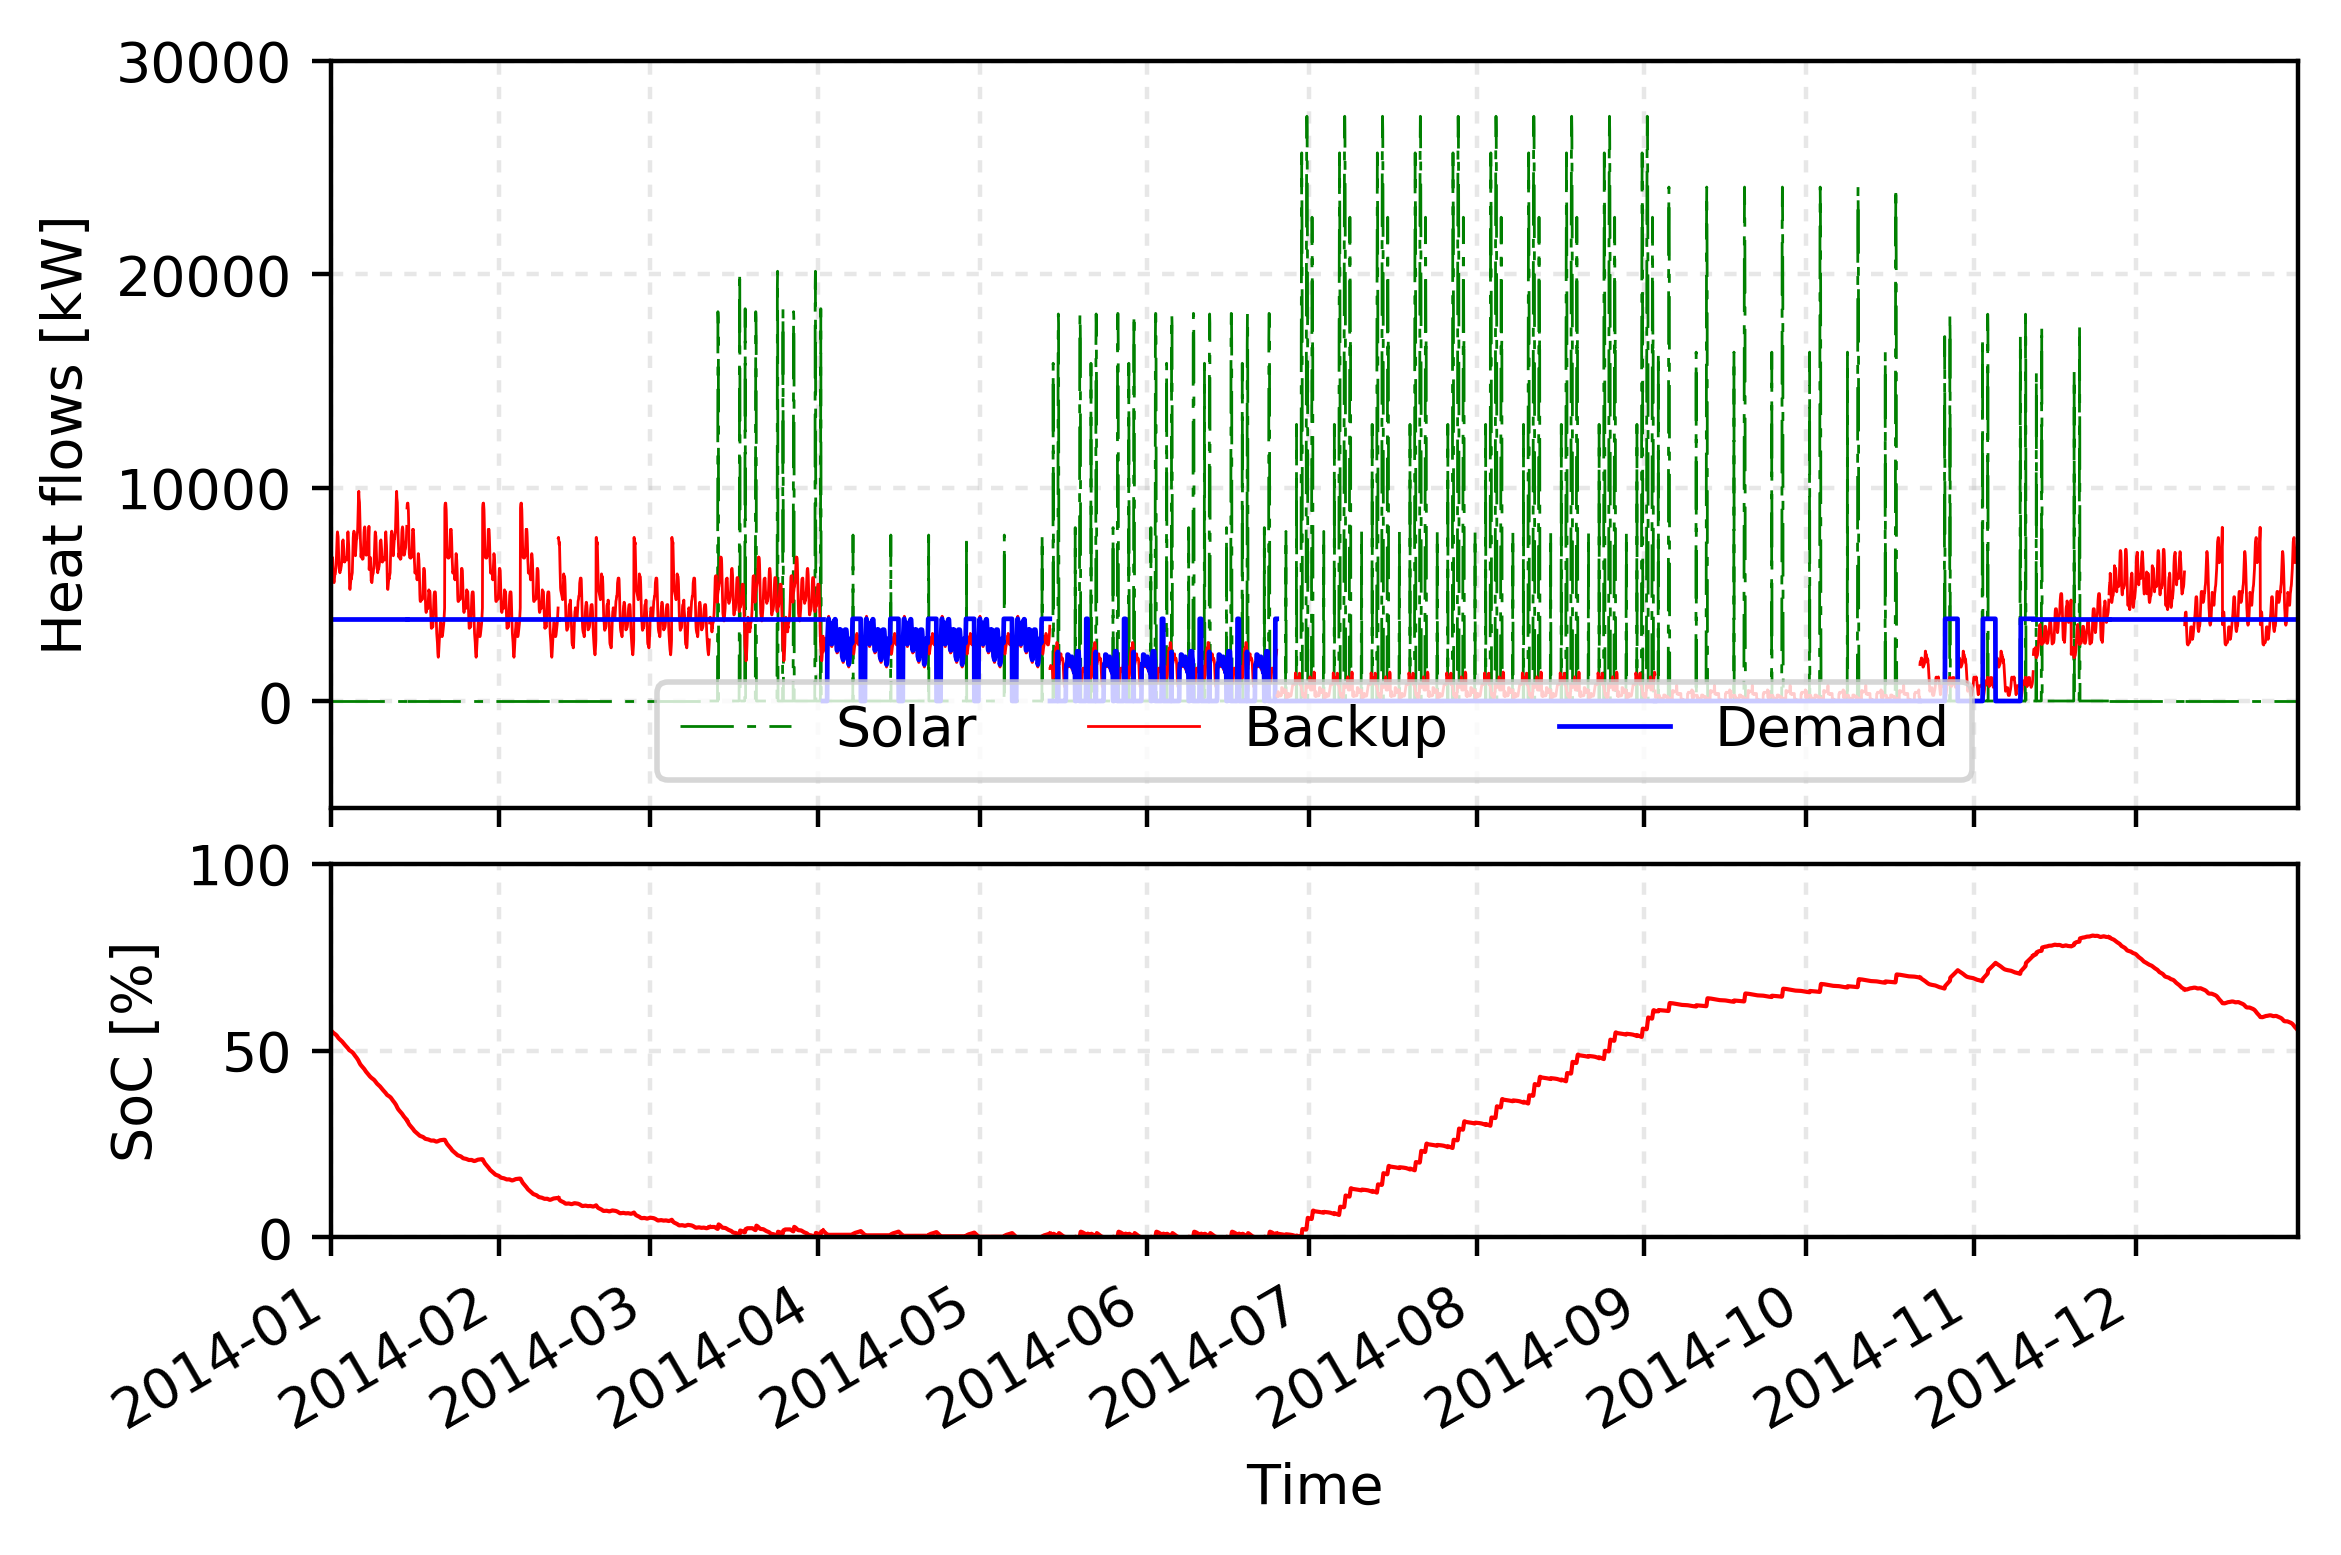

In [35]:
%matplotlib inline
opt = optimizers

fig_out, axs = plt.subplots(2, 1, sharex=True, gridspec_kw=dict(height_ratios=[2, 1]))
start_d = pd.Timestamp('20140101')
next_d = start_d

prev_curt = 0

for startD, num_reps in selection.iteritems():
    # Heat flows
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='solar', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='g', linestyle = '-.', linewidth=0.5)
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='demand', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='r', linewidth=0.5)
    axs[0].plot(
        construct_heat_flow(name='heat_flow', comp='backup', node='Node',
                            optimizer=opt[startD], reps=num_reps,
                            start_date=next_d)/1e3,
        color='b', linewidth=0.85)

    # Storage state
    results = opt[startD].get_component(name='storage',
                                        node='Node').get_soc()
    date_ind = pd.DatetimeIndex(start=next_d, freq='1H',
                                periods=len(results))
    axs[1].plot(date_ind, results, color='r', label=str(startD), linewidth=0.75)

    next_d = next_d + pd.Timedelta(days=duration_repr * num_reps)

axs[0].legend(['Solar', 'Backup', 'Demand'], loc='lower center', ncol=3)
#axs[0].set_title('Representative')

axs[0].set_ylim(-5e3, 30e3)

axs[0].set_ylabel('Heat flows [kW]')
axs[1].set_ylabel('SoC [%]')

axs[1].set_xlabel('Time')

for ax in axs:
    ax.grid(alpha=0.3, linestyle=':')
plt.gcf().autofmt_xdate()
fig_out.tight_layout()
fig_out.figsize=(8,6)
fig_out.dpi = 400
fig_out.subplots_adjust(wspace=0.1, hspace=0.1)

In [36]:
fig_out.savefig('ReprYear8w.png', dpi=400)

plt.show()

In [37]:
print energy_backup_full/1e6
print energy_sol_full/1e6
print energy_stor_loss_full/1e6
print energy_curt_full/1e6
print SolarPanelSingleNode.get_demand_energy(full_model)/1e6

print (energy_backup_full+energy_sol_full-energy_stor_loss_full)/1e6

17.1435044769
6.51030262093
1.12349258175
0.0
22.5303145161
22.5303145161


In [38]:
print energy_backup_repr/1e6
print energy_sol_repr/1e6
print energy_stor_loss_repr/1e6
print energy_curt_repr/1e6
print get_demand_energy(optimizers, selection)/1e6

print (energy_backup_repr+energy_sol_repr-energy_stor_loss_repr)/1e6

17.1896807394
6.58179125313
1.12093662204
0.0
22.6505353705
22.6505353705


13.3877127024
10.1754793513
0.952976333367
3.61091720412
22.6102157203
22.6102157203

In [39]:
(energy_backup_full-energy_backup_repr)/energy_backup_full

-0.0026935136023266155

In [40]:
40000.0 75000.0 3850000.0 13004951.649977371  931935.0849920592  3010638.209766237  10457297.951076578 

SyntaxError: invalid syntax (<ipython-input-40-ea21fb09aec3>, line 1)

In [41]:
print energy_backup_repr/1e6
print full_model.get_result('heat_flow', node='Node', comp='backup').sum()/1e9/0.95

17.1896807394
18.0457941862


In [42]:
print energy_curt_full

0.0


In [43]:
print energy_curt_repr

0.0


In [44]:
(energy_backup_full-energy_backup_repr)/energy_backup_full

-0.0026935136023266155

In [45]:
value(full_model.model.Slack)

NameError: name 'value' is not defined

In [ ]:
for i in full_model.model.Node.backup.component_objects():
    print i

In [ ]:
repr_sol=[]
for startD, opt in optimizers.iteritems():
    num_reps = selection[startD]
    repr_sol.extend(construct_heat_flow(name='heat_flow', comp='solar', node='Node',
                            optimizer=optimizers[startD], reps=num_reps,
                            start_date=next_d).values)
    
len(repr_sol)

repr_sol = sorted(repr_sol, reverse=True)

In [ ]:
full_sol = sorted(full_model.get_result('heat_flow', node='Node', comp='solar'), reverse=True)
len(full_sol)

In [ ]:
%matplotlib inline

In [ ]:
fig, ax = plt.subplots()
ax.plot(repr_sol, label='Repr')
ax.plot(full_sol, label='Full')
ax.legend()

## Plot representative periods

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from collections import OrderedDict
import TimeSliceSelection.PeriodSelector as ps
import TimeSliceSelection.DataCollection as dc

In [2]:
time_step = 1 

heat_data = dc.read_heat('HeatDemandWithInitFiltered', expand=True, neighborhood='TermienWest', time_step=time_step)
solar_data = dc.read_solar(time_step=time_step, expand=True)
corr_sol_heat = (heat_data - heat_data.mean()) * (solar_data - solar_data.mean())

data = {
    'Heat [W]': heat_data,
    'Temp [degC]': dc.read_weather('extT', column='Te', expand=True, time_step=time_step) - 273.15,
    'Solar [W/m2]': solar_data,
    'Correlation [W2/m2]': corr_sol_heat
}

weights = {'Heat [W]': 2,
           'Temp [degC]': 1,
           'Solar [W/m2]': 2,
           'Correlation [W2/m2]': 3}

In [3]:
opt = ps.PeriodSelector(data=data, weights=weights, time_step=time_step, duration=7, num_periods=12, num_bins=10, 
                        season_bounds=[(42, 100), (101, 258), (259, 298), (299, 41)])

In [4]:
selection = OrderedDict([(7, 2.0),
             (15, 4.0),
             (24, 4.0),
             (65, 3.0),
             (81, 6.0),
             (131, 6.0),
             (179, 10.0),
             (229, 7.0),
             (281, 3.0),
             (294, 2.0),
             (337, 2.0),
             (351, 3.0)])

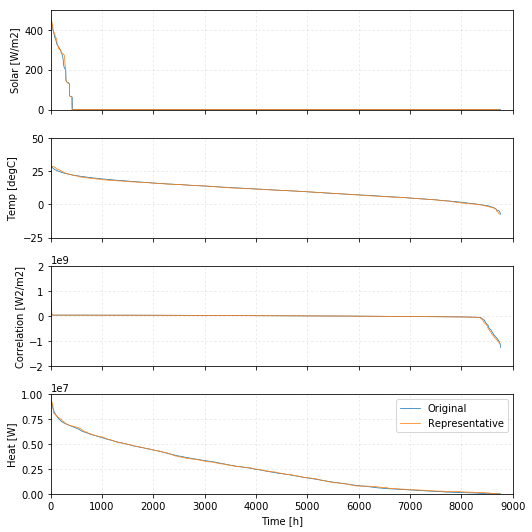

In [14]:
fig = opt.plot_duration(selection)

fig.set_size_inches(7.5, 7.5, forward=True)
fig.axes[-1].set_ylim(0, None)
#plt.tight_layout()
#fig.subplots_adjust(wspace=0.15, hspace=0.15)

for ax in fig.axes:
    ax.grid(alpha=0.3, linestyle=':')
fig.tight_layout()
fig.savefig('Duration12w.png', dpi=400)


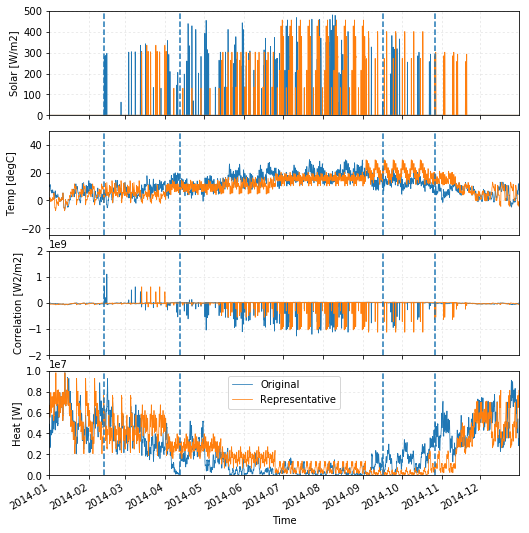

In [15]:
fig = opt.plot_recomposite(selection)

for ax in fig.axes:
    ax.grid(alpha=0.3, linestyle=':')
fig.set_size_inches(7.5,7.5, forward=True)
plt.tight_layout()
fig.axes[-1].set_ylim(0,None)
fig.subplots_adjust(wspace=0.15, hspace=0.15)

fig.savefig('Repr12w.png', dpi=400)